In [66]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
%matplotlib inline

In [12]:
np.random.seed(888888)

In [13]:
x = np.random.normal(0,1,50)

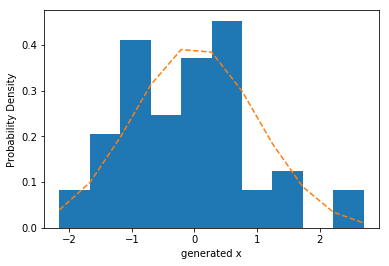

In [67]:
fig, ax = plt.subplots()
# the histogram of the data
n, bins, patches = ax.hist(x, 10, normed=1)
# add a 'best fit' line
y = mlab.normpdf(bins, 0, 1)
ax.plot(bins, y, '--')
ax.set_xlabel('generated x')
ax.set_ylabel('Probability Density')
#ax.set_title(r'Histogram of x: $\mu=0$, $\sigma=1$')

In [18]:
import pymc3 as pm

In [55]:
%%time
with pm.Model() as generated_model_1:
    #prior, only unknown parameter is mu
    mean = pm.Normal('mu', mu=0, sd=0.5)
    #likelihood
    obs = pm.Normal('obs', mu=mean, sd=1, observed=x)

CPU times: user 62.5 ms, sys: 0 ns, total: 62.5 ms
Wall time: 81.5 ms


In [56]:
%%time
with generated_model_1:
    trace = pm.sample(10000, tune=5000,njobs = 4)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -72.344: 100%|██████████| 200000/200000 [00:37<00:00, 5315.14it/s]
Finished [100%]: Average ELBO = -72.331
100%|██████████| 10000/10000 [00:49<00:00, 202.94it/s]


CPU times: user 43.1 s, sys: 6.22 s, total: 49.3 s
Wall time: 1min 35s


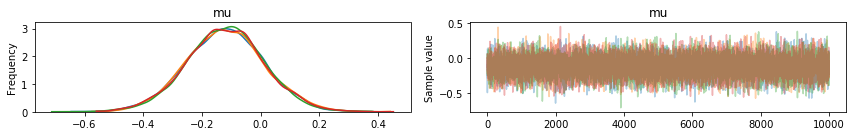

In [68]:
pm.traceplot(trace)
pass

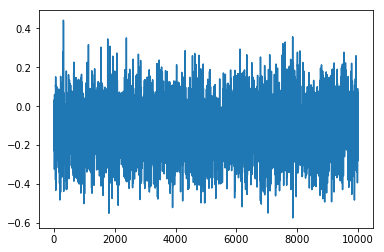

In [69]:
#see how one chain look like
fig, ax = plt.subplots()
ax.plot(trace.get_values('mu', chains=1))
pass


In [73]:
pm.df_summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
mu,-0.119836,0.132507,0.001065,-0.377706,0.143983


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ac26557f0>], dtype=object)

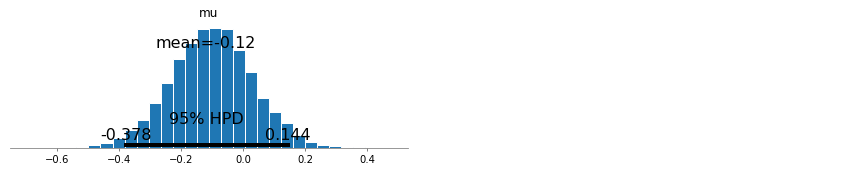

In [70]:
pm.plot_posterior(trace, varnames=['mu'])

In [61]:
print(pm.diagnostics.gelman_rubin(trace))

{'mu': 0.99999073413578943}


In [62]:
print(pm.diagnostics.effective_n(trace))

{'mu': 13826.0}


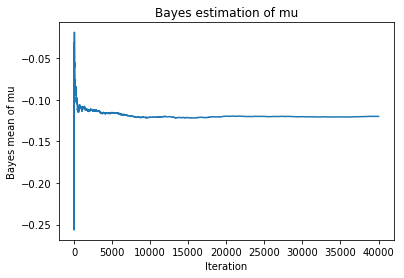

In [71]:
# plot the estimate for the mean of mu, accumulating mean
fig, ax = plt.subplots()
mu_samples = trace['mu']
m_mu_samples = [np.mean(mu_samples[:i]) for i in np.arange(1, len(mu_samples))]
ax.plot(m_mu_samples)
ax.set_xlabel('Iteration')
ax.set_ylabel('Bayes mean of mu')
ax.set_title('Bayes estimation of mu')


In [51]:
#95% two-tails 1.96 sigma
#calculate confidence interval in a frequentist way
import scipy as sp
import scipy.stats

In [52]:
m, se = np.mean(x), scipy.stats.sem(x)
h = se * sp.stats.t._ppf((1+0.95)/2., len(x)-1)

In [53]:
cf = [m,m-h,m+h]
cf

[-0.12871826117464455, -0.41608805032068508, 0.15865152797139595]

In [ ]:
pm.forestplot(trace, varnames=['mu'], main="forest plot")

In [ ]:
fig, ax = plt.subplots()
mu = 0
sigma = 1
x_axis = np.linspace(mu-3,mu+3, 100)
y1 = mlab.normpdf(x_axis, mu, 0.5)
y2 = mlab.normpdf(x_axis,-0.5,1.5)
ax.plot(x_axis, y1)
ax.plot(x_axis,y2)